In [14]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-08-11 04:08:42--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.1’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2021-08-11 04:08:42 (8.00 MB/s) - ‘Lenna_(test_image).png.1’ saved [473831/473831]



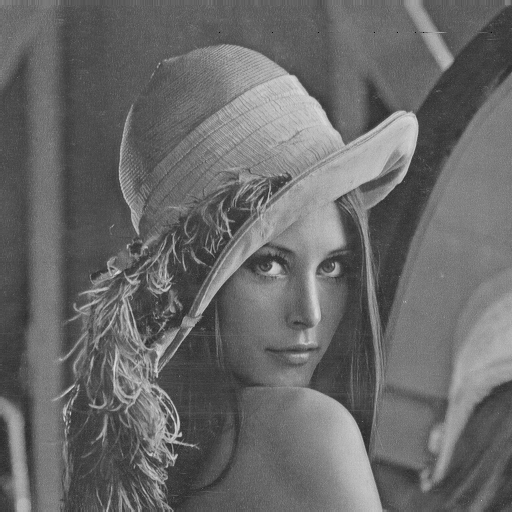

In [15]:
import cv2
img = cv2.imread("/content/Lenna_(test_image).png")[:,:,0:1]
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [17]:
import numpy as np

def operate(img, kernel):
    kernel_size = len(kernel)

    mid_x = int(kernel_size//2)
    mid_y = int(kernel_size//2)

    dx = np.zeros((kernel_size, kernel_size))
    dy = np.zeros((kernel_size, kernel_size))

    for i in range(kernel_size):
        for j in range(kernel_size):
            dx[i][j] = int(i-mid_x)
            dy[i][j] = int(j-mid_y)

    final_image = np.zeros((img.shape[0], img.shape[1], 1))

    for i in range(int(mid_x), img.shape[0]-(kernel_size//2)):
        for j in range(int(mid_y), img.shape[1]-(kernel_size//2)):
            sum = 0.00
            for k_i in range(kernel_size):
                for k_j in range(kernel_size):
                    sum += img[i+int(dx[k_i][k_j])][j+int(dy[k_i][k_j])][0]*kernel[k_i][k_j]
            final_image[i][j][0] = sum

    return final_image

In [18]:
def thresholding(img, threshold):
    final_image = np.zeros((img.shape[0], img.shape[1], 1))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j][0] > threshold:
                final_image[i][j][0] = img[i][j][0]
    return final_image

In [19]:
prewitt_vertical_kernel = [
          [-1, 0, 1],
          [-1, 0, 1],
          [-1, 0, 1]
]

prewitt_horizontal_kernel = [
          [-1, -1, -1],
          [0, 0, 0],
          [1, 1, 1]
]

sobel_vertical_kernel =  [
          [-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]
]

sobel_horizontal_kernel = [
          [-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]
]

In [21]:
prewitt_vertical_image = operate(img, prewitt_vertical_kernel)
prewitt_vertical_image_t = thresholding(prewitt_vertical_image, 48)

prewitt_horizontal_image = operate(img, prewitt_horizontal_kernel)
prewitt_horizontal_image_t = thresholding(prewitt_horizontal_image, 48)

sobel_vertical_image = operate(img, sobel_vertical_kernel)
sobel_vertical_image_t = thresholding(sobel_vertical_image, 48)

sobel_horizontal_image = operate(img, sobel_horizontal_kernel)
sobel_horizontal_image_t = thresholding(sobel_horizontal_image, 48)

prewitt_vertical_image       (Without Thresholding)        prewitt_horizontal_image


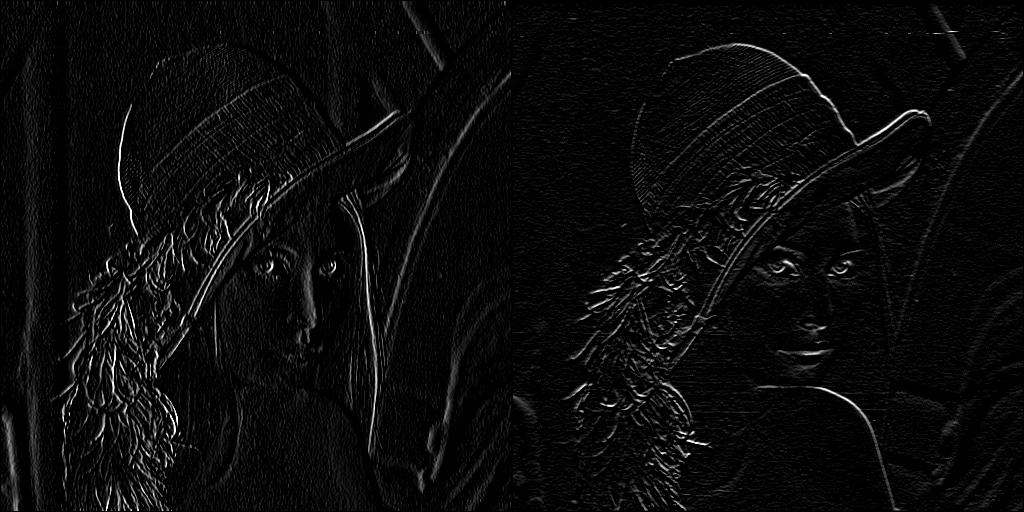

sobel_vertical_image      (Without Thresholding)           sobel_horizontal_image


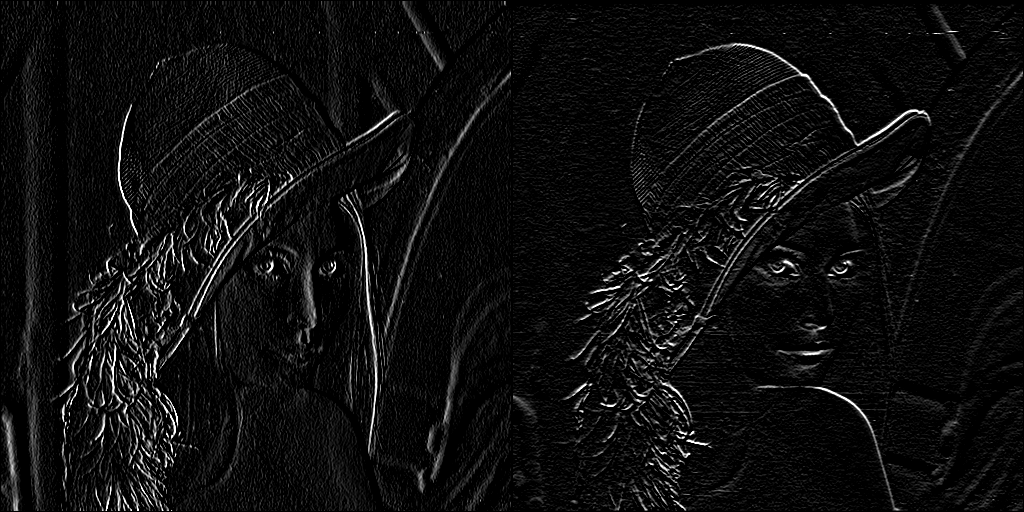

prewitt_vertical_image       (With Thresholding)        prewitt_horizontal_image


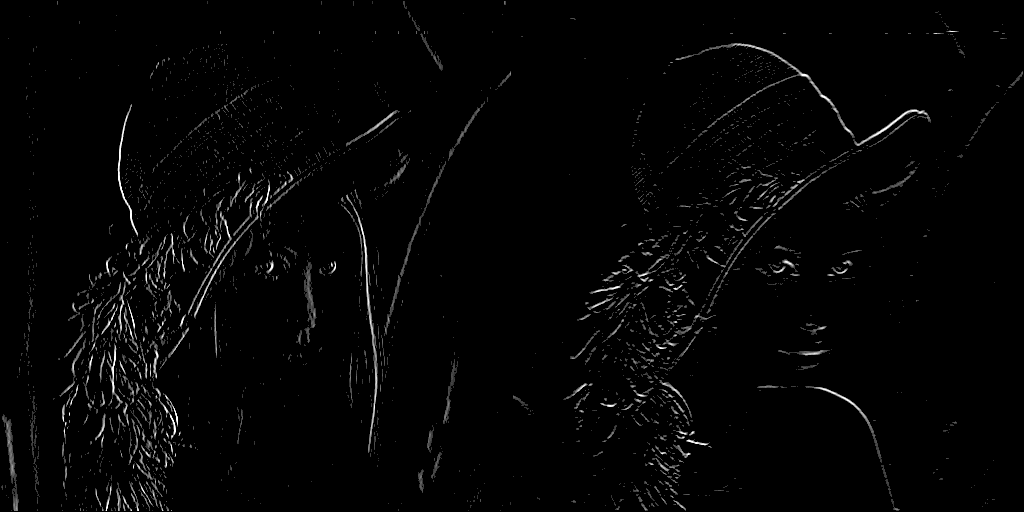

sobel_vertical_image      (With Thresholding)           sobel_horizontal_image


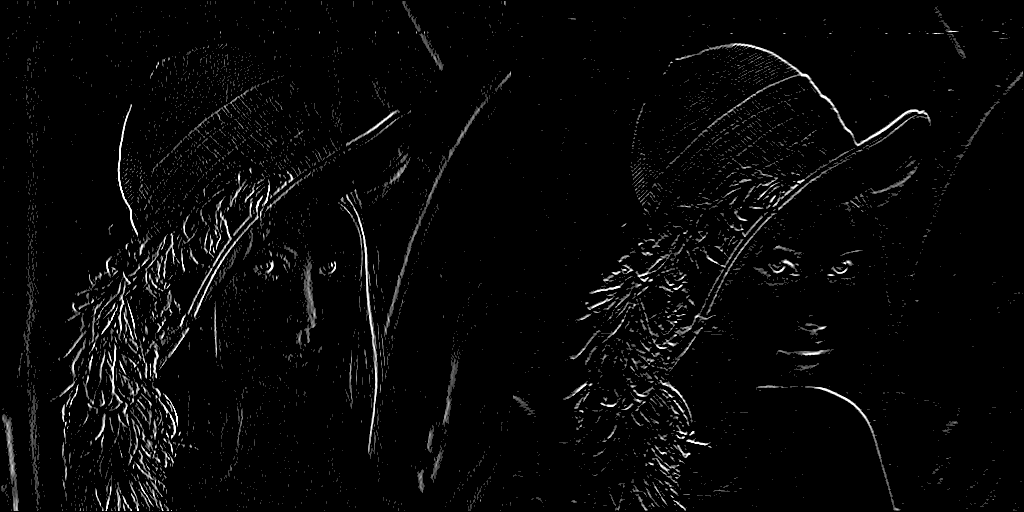

In [22]:
print("prewitt_vertical_image       (Without Thresholding)        prewitt_horizontal_image")
vh_1 = np.hstack((prewitt_vertical_image, prewitt_horizontal_image))
cv2_imshow(vh_1)

print("sobel_vertical_image      (Without Thresholding)           sobel_horizontal_image")
vh_2 = np.hstack((sobel_vertical_image, sobel_horizontal_image))
cv2_imshow(vh_2)

print("prewitt_vertical_image       (With Thresholding)        prewitt_horizontal_image")
vh_3 = np.hstack((prewitt_vertical_image_t, prewitt_horizontal_image_t))
cv2_imshow(vh_3)

print("sobel_vertical_image      (With Thresholding)           sobel_horizontal_image")
vh_4 = np.hstack((sobel_vertical_image_t, sobel_horizontal_image_t))
cv2_imshow(vh_4)

In [23]:
# Laplacian 

laplacian_vertical_kernel = [
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
]

laplacian_horizontal_kernel = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

laplacian_vertical_image = operate(img, laplacian_vertical_kernel)
# sobel_vertical_image_t = thresholding(sobel_vertical_image, 48)

laplacian_horizontal_image = operate(img, laplacian_horizontal_kernel)
# sobel_horizontal_image_t = thresholding(sobel_horizontal_image, 48)

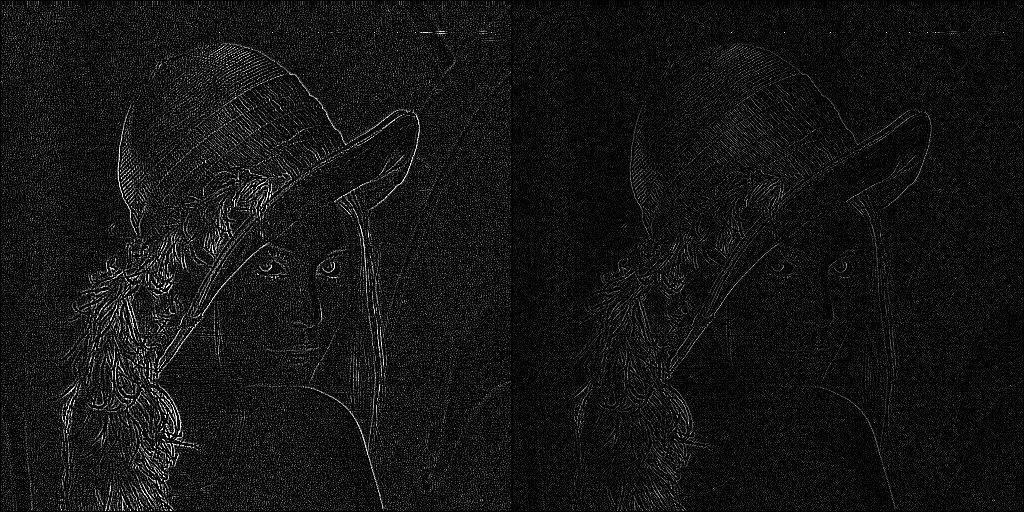

In [24]:
stack = np.hstack((laplacian_vertical_image, laplacian_horizontal_image))
cv2_imshow(stack)

In [25]:
zero_crossing_horizontal_kernel = [
                                   [0 , 0, 0],
                                   [1, -2, 1],
                                   [0, 0, 0]
                                ]
zero_crossing_vertical_kernel = [[0, 1, 0],
                                 [0, -2, 0],
                                 [0, 1, 0]
                                ]

zero_crossed_image_horizontal = operate(img, zero_crossing_horizontal_kernel)
zero_crossed_image_vertical = operate(img, zero_crossing_vertical_kernel)

zero_crossed_vertical_image       zero_crossed_horizontal_image  


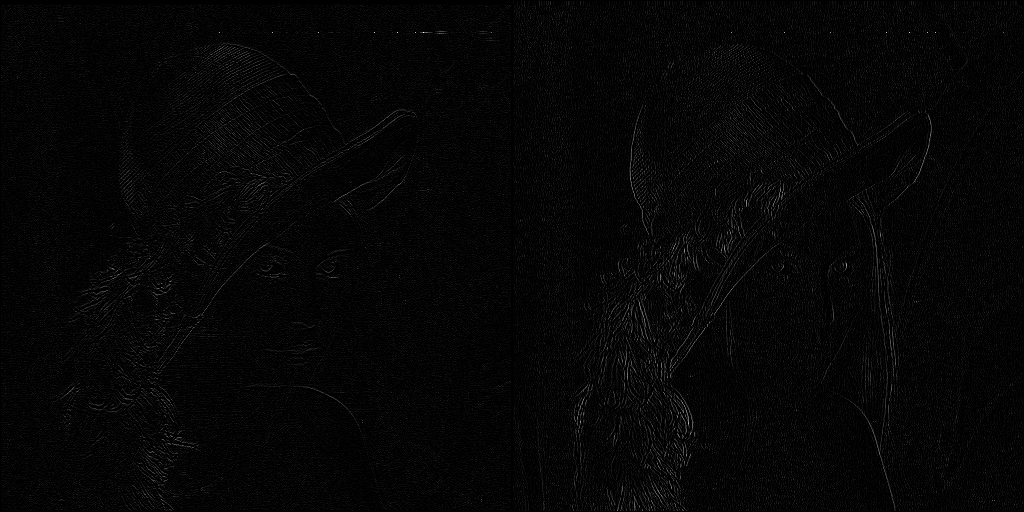

In [26]:
print("zero_crossed_vertical_image       zero_crossed_horizontal_image  ")
vh_5 = np.hstack((zero_crossed_image_vertical, zero_crossed_image_horizontal))
cv2_imshow(vh_5)